# Probability and Statistics

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import t
import decimal
import matplotlib.pyplot as plt
import seaborn as sns
col = 'viridis'
#col ="plasma"
#col = "terrain" #not bad just makes the highest points not stand out super clearly
#col = 'gist_earth' #very good for getting the lowest points
#col = 'magma'

## Format

In [0]:
!ls '/content/drive/My Drive/good data/'

Formatted_100x100_All_Data.csv	       Formatted_30x20_Car_Data.csv
Formatted_100x100_Car_Data.csv	       Formatted_30x30_All_Data.csv
Formatted_15x10_All_Data.csv	       Formatted_30x30_Car_Data.csv
Formatted_15x10_Car_Data.csv	       Formatted_50x50_All_Data.csv
Formatted_15x15_All_Data.csv	       Formatted_50x50_Car_Data.csv
Formatted_15x15_Car_Data.csv	       Formatted_5x5_All_Data.csv
Formatted_15x15_TowedVehicle_Data.csv  Formatted_5x5_Car_Data.csv
Formatted_30x20_All_Data.csv


In [0]:
#load data in and format it in data frame to do analysis
ps = "/content/drive/My Drive/good data/Formatted_50x50_Car_Data.csv"
indices = ["start_date", "end_date", "number_rows", "number_columns", "total_calls", "fahrenheit", "hourly_precipitation_inches", "relative_humidity"]
header = pd.read_csv(ps,nrows=0)
#header.head()
temp = pd.read_csv(ps,skiprows=[0], header = None)
temp = temp.drop(columns=[0,1,2,3,4,5,6,7])
tempo = temp
data = pd.read_csv(ps,skiprows=[0],usecols=[0,1,2,3,4,5,6,7],header=None,names = indices)

#column for time of day for correlation 
data['ToD'] = data['start_date']
data['ToD'][::4]='night' #THIS CODE GETS ALL ROWS OF A CERTAIN TIME OF DAY
data['ToD'][1::4]='noon'
data['ToD'][2::4]='noon'
data['ToD'][3::4]='night'
data['ToD'] =data['ToD'].astype('category').cat.codes
data.head() ####moved this to half day increments


#get total crime in all grid at a certain level for that time frame ie row:
data['All0'] = temp[temp.columns[::5]].sum(axis = 1, skipna = True) 
data['All1'] = temp[temp.columns[1::5]].sum(axis = 1, skipna = True)
data['All2'] = temp[temp.columns[2::5]].sum(axis = 1, skipna = True) 
data['All3'] = temp[temp.columns[3::5]].sum(axis = 1, skipna = True) 
data['All4'] = temp[temp.columns[4::5]].sum(axis = 1, skipna = True) 
#data['All']= data['All4']+data['All3']+data['All2']+data['All1']+data['All0'] checking that the summing functions were working correctly
data.head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set 

,start_date,end_date,number_rows,number_columns,total_calls,fahrenheit,hourly_precipitation_inches,relative_humidity,ToD,All0,All1,All2,All3,All4
0,2013-07-01T00:00,2013-07-01T06:00,50,50,21,79.670,0.000000,88.602500,0,0,21,0,0,0
1,2013-07-01T06:00,2013-07-01T12:00,50,50,34,81.500,0.000000,83.821538,1,0,34,0,0,0
2,2013-07-01T12:00,2013-07-01T18:00,50,50,26,83.030,0.021667,82.553077,1,0,26,0,0,0
3,2013-07-01T18:00,2013-07-02T00:00,50,50,42,81.212,0.000000,87.307000,0,0,42,0,0,0
4,2013-07-02T00:00,2013-07-02T06:00,50,50,24,79.520,0.000000,86.903000,0,0,24,0,0,0


In [0]:
nColumns = data.iloc[1,3]
nRows = data.iloc[1,2]
nPlaces = nColumns*nRows
place = [None] * (nPlaces)

print(nPlaces)

2500


In [0]:
tempo.head()

,8,9,10,11,12,13,14,15,16,17,...,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
print(tempo.columns[0:5])
i=8
print(temp[i]+temp[i+1]+temp[i+2]+temp[i+3]+temp[i+4])
for i in range(8,5*nPlaces+8,5):#nPlaces):
    name = "{}".format(str((int)((i-8)/5)))
    if i%10 == 0:
      print(i)
    tempo[name] =  temp[i]+temp[i+1]+temp[i+2]+temp[i+3]+temp[i+4] 
p = pd.DataFrame(tempo)
#pd.set_option('display.max_columns', 200)
#p.head(n=5)


Int64Index([8, 9, 10, 11, 12], dtype='int64')
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8452    0
8453    0
8454    0
8455    0
8456    0
8457    0
8458    0
8459    0
8460    0
8461    0
8462    0
8463    0
8464    0
8465    0
8466    0
8467    0
8468    0
8469    0
8470    0
8471    0
8472    0
8473    0
8474    0
8475    0
8476    0
8477    0
8478    0
8479    0
8480    0
8481    0
Length: 8482, dtype: int64


In [0]:
#data[data.columns[5:]].corr().columns[4]
#data['total_calls'][:]
#corrData = 
#corrData.reset_index(drop=True, inplace=True)
#temp2.reset_index(drop=True, inplace=True)
corrData = pd.concat([data.iloc[:,4:9], p.iloc[:,(nPlaces*5):]], axis=1)
#corrData = ,temp
#corrData.drop('start_date')
corrData.head()

,total_calls,fahrenheit,hourly_precipitation_inches,relative_humidity,ToD,0,1,2,3,4,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,21,79.670,0.000000,88.602500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,81.500,0.000000,83.821538,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,83.030,0.021667,82.553077,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42,81.212,0.000000,87.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,79.520,0.000000,86.903000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
correlation = corrData.corr(method ='pearson')
correlation.head(n=5)

,total_calls,fahrenheit,hourly_precipitation_inches,relative_humidity,ToD,0,1,2,3,4,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
total_calls,1.000000,-0.091706,-0.030189,-0.161843,0.160815,0.032146,0.086583,1.910214e-02,0.049376,0.034014,...,NaN,NaN,NaN,0.060149,NaN,0.011539,NaN,NaN,NaN,NaN
fahrenheit,-0.091706,1.000000,0.015409,0.095909,0.086402,-0.006436,0.002518,-1.368345e-02,-0.024053,-0.004169,...,NaN,NaN,NaN,0.008306,NaN,0.002608,NaN,NaN,NaN,NaN
hourly_precipitation_inches,-0.030189,0.015409,1.000000,0.244887,0.012006,0.001008,-0.005677,4.123280e-02,0.002820,-0.012925,...,NaN,NaN,NaN,0.007223,NaN,-0.006327,NaN,NaN,NaN,NaN
relative_humidity,-0.161843,0.095909,0.244887,1.000000,-0.204372,0.005174,-0.004598,9.964206e-05,0.004144,-0.014906,...,NaN,NaN,NaN,-0.018479,NaN,-0.001972,NaN,NaN,NaN,NaN
ToD,0.160815,0.086402,0.012006,-0.204372,1.000000,0.006852,0.017283,-9.509611e-20,0.014502,0.014934,...,NaN,NaN,NaN,0.013485,NaN,-0.002805,NaN,NaN,NaN,NaN


In [0]:
#total call correlation
tempCall = pd.DataFrame(np.array(correlation.iloc[0,5:]).reshape(nColumns,nRows))
tempCall.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.032146,0.086583,0.019102,0.049376,0.034014,0.048149,0.052791,-0.008161,0.037356,0.023287,...,0.089794,0.032982,0.025014,0.008921,0.023785,0.019590,0.095415,0.079780,0.021293,NaN
1,0.054966,0.070376,0.029488,0.019383,0.056373,0.050294,0.016338,0.038901,0.044941,0.024662,...,0.081108,0.018224,0.053772,0.043188,0.021222,0.069121,0.067379,0.000912,0.008462,0.010892
2,0.078525,0.065836,0.065589,0.058181,0.018047,0.034347,0.045004,0.042018,0.015087,0.019266,...,0.033853,0.045024,0.014624,0.039467,0.087063,0.081292,0.028095,0.021738,0.019797,NaN
3,0.067462,0.150171,0.057776,0.091260,0.075751,0.054060,0.044274,0.030024,0.026590,0.027546,...,0.064299,0.064128,0.045039,0.083269,0.053851,0.013178,0.037978,0.050262,0.061775,0.041239
4,0.000468,0.041496,0.195320,0.079524,0.058768,0.066840,0.067239,0.044767,0.036688,0.045520,...,0.058209,0.053156,0.077495,0.063234,0.044066,0.033907,0.018809,0.058521,0.062297,0.042490


Text(0.5, 1.0, 'Geographical Correlation with Total Crime')

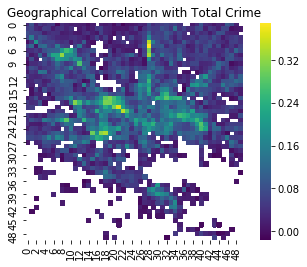

In [0]:
sns.heatmap(tempCall,cmap=col,square=True)
plt.title('Geographical Correlation with Total Crime')

In [0]:
tempCall.to_csv('carCall.csv')
!cp carCall.csv drive/My\ Drive/

In [0]:
#time of Day correlation
tempTemp = pd.DataFrame(np.array(correlation.iloc[1,5:]).reshape(nColumns,nRows))
tempTemp.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.006436,0.002518,-0.013683,-0.024053,-0.004169,-0.002541,0.028828,0.007246,-0.001921,0.001031,...,0.009881,-0.008651,0.009097,0.019381,-0.000660,-0.005107,0.007741,0.008194,0.030155,NaN
1,0.022536,-0.003462,-0.014723,0.000380,-0.007207,-0.004714,0.014333,-0.009919,0.010891,-0.007161,...,0.014841,-0.046689,-0.077755,-0.005459,-0.003523,-0.006733,-0.010025,-0.013947,0.027108,0.007006
2,0.008913,0.027633,0.001278,-0.010513,-0.004255,0.007876,0.010589,0.011129,0.015549,0.001800,...,-0.013817,0.020699,0.005495,0.003987,-0.020232,-0.009890,0.007644,0.007483,-0.007806,NaN
3,0.019520,0.010638,-0.006226,0.007025,0.001134,-0.010223,0.000904,0.020173,0.003207,-0.014469,...,-0.003203,-0.006865,0.003197,-0.016110,0.002073,0.016112,0.023051,-0.009469,0.015312,-0.022799
4,0.016593,0.002617,-0.011511,-0.023416,0.006542,-0.005344,0.000605,0.021083,0.010504,0.010212,...,0.005398,0.008853,-0.002827,-0.012057,-0.000789,0.012668,0.007275,0.008580,-0.011408,-0.018050


Text(0.5, 1.0, 'Geographical Correlation with Temperature')

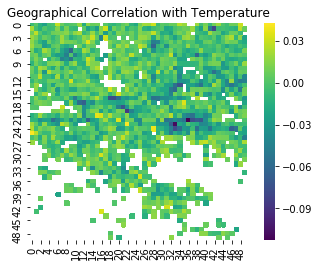

In [0]:
sns.heatmap(tempTemp,cmap=col,square=True)
plt.title('Geographical Correlation with Temperature')

In [0]:
tempTemp.to_csv('carTemp.csv')
!cp carTemp.csv drive/My\ Drive/

In [0]:
#temp correlation
tempPrecip = pd.DataFrame(np.array(correlation.iloc[2,5:]).reshape(nColumns,nRows))
tempPrecip.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.001008,-0.005677,0.041233,0.002820,-0.012925,0.000089,-0.009715,0.001711,-0.001430,-0.003141,...,-0.002514,-0.009240,-0.009592,-0.012342,-0.007079,-0.001588,-0.004096,0.010756,0.050557,NaN
1,0.027105,-0.001833,-0.010527,-0.005893,0.001370,-0.005893,-0.001412,0.015042,0.001933,0.005715,...,0.014582,-0.010239,-0.018379,-0.011240,-0.007381,-0.001271,-0.010211,0.003660,-0.008568,-0.003808
2,0.003296,0.001207,0.001713,-0.001865,0.008512,-0.007752,-0.000505,0.002568,-0.005456,-0.003857,...,0.000327,-0.009350,-0.005708,0.030945,-0.009534,0.009141,-0.012539,-0.006255,0.017612,NaN
3,0.009544,0.000613,0.010876,0.004132,0.019111,-0.006940,-0.008056,0.004190,-0.011257,-0.008898,...,0.011521,-0.005011,0.000263,-0.007728,-0.005911,-0.007590,-0.000587,-0.012157,-0.000449,0.007420
4,-0.007972,-0.000550,-0.006832,-0.004995,-0.004695,-0.001866,-0.005292,-0.011053,-0.005777,0.005044,...,-0.005365,-0.005827,0.003690,-0.000998,0.001424,0.004248,0.019731,-0.000127,-0.003471,0.017628


Text(0.5, 1.0, 'Geographical Correlation with Precipitation')

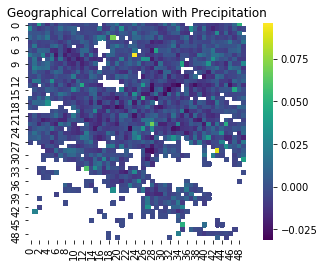

In [0]:
sns.heatmap(tempPrecip,cmap=col,square=True)
plt.title('Geographical Correlation with Precipitation')

In [0]:
tempPrecip.to_csv('carPrecip.csv')
!cp carPrecip.csv drive/My\ Drive/

In [0]:
#humidity correlation
tempHum = pd.DataFrame(np.array(correlation.iloc[3,5:]).reshape(nColumns,nRows))
tempHum.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.005174,-0.004598,0.000100,0.004144,-0.014906,-0.007473,-0.003670,0.025357,0.003414,-0.002570,...,-0.003061,-0.008853,0.020104,-0.012813,-0.004427,0.000445,-0.004856,-0.017899,0.004362,NaN
1,-0.012264,-0.003912,-0.027055,-0.032502,-0.012511,-0.005046,-0.010665,-0.005330,-0.013509,-0.009841,...,-0.014222,-0.028566,-0.030469,-0.016919,0.004530,0.009073,-0.002716,-0.005609,-0.012366,-0.011179
2,-0.028214,-0.009683,-0.004554,-0.008939,-0.013504,-0.002209,-0.009476,-0.006082,-0.008703,-0.002556,...,0.019746,-0.015901,-0.000919,-0.002593,-0.002586,0.001920,-0.024424,-0.018322,0.000536,NaN
3,-0.024629,-0.042506,-0.028869,0.001013,-0.001008,0.000737,-0.008386,-0.012817,-0.024228,-0.011289,...,-0.005677,-0.022270,0.006024,0.008130,-0.009979,-0.009516,0.001839,-0.004432,-0.003635,-0.007439
4,-0.000236,-0.013103,-0.055291,-0.022088,0.004623,-0.003086,-0.024626,-0.030160,-0.004692,-0.025377,...,-0.031180,-0.001107,0.014699,0.011547,0.003159,-0.009836,0.002239,-0.014233,-0.018981,-0.001184


Text(0.5, 1.0, 'Geographical Correlation with Humidity')

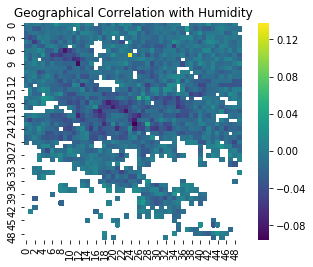

In [0]:
sns.heatmap(tempHum,cmap=col,square=True)
plt.title('Geographical Correlation with Humidity')

In [0]:
tempHum.to_csv('carHumid.csv')
!cp carHumid.csv drive/My\ Drive/

In [0]:
#ToD correlation
tempTod = pd.DataFrame(np.array(correlation.iloc[4,5:]).reshape(nColumns,nRows))
tempTod.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.006852,0.017283,-9.509611e-20,0.014502,0.014934,0.021679,0.005819,6.951963e-19,0.006806,0.011331,...,0.015031,0.001143,0.019498,1.453667e-02,0.009854,1.507153e-02,0.018929,0.035645,0.017457,NaN
1,0.010329,0.011946,1.608677e-02,0.004106,0.001131,0.020528,-0.004857,-1.810632e-02,0.017058,-0.007115,...,0.033107,0.007826,-0.014633,-8.253849e-03,0.003282,1.288133e-18,0.016078,-0.004860,-0.003526,0.008284
2,0.020814,0.029208,1.012704e-02,0.012414,0.015363,0.029851,0.009723,1.966969e-02,0.017737,-0.006270,...,-0.014287,0.024935,0.001658,-9.244739e-19,-0.003173,-2.249302e-02,0.008915,0.009297,0.027124,NaN
3,0.009774,0.039655,3.932162e-03,0.026366,0.029531,0.013989,0.020646,9.844747e-03,0.013251,0.004764,...,-0.002324,0.019363,0.019479,-1.779305e-03,0.022035,2.635515e-03,-0.008369,0.007094,-0.012571,0.001789
4,-0.019438,0.022354,7.029088e-02,0.018440,0.012340,0.026550,-0.021011,-2.802135e-18,0.013835,-0.002683,...,0.008022,0.008584,-0.008752,-7.849183e-03,0.003050,3.729345e-03,0.003280,-0.000983,0.028576,0.002247


Text(0.5, 1.0, 'Geographical Correlation with Time of Day')

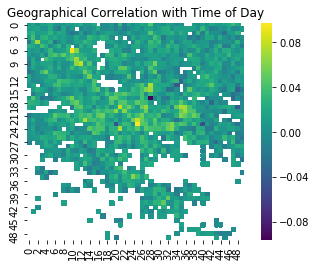

In [0]:
sns.heatmap(tempTod,cmap=col,square=True)
plt.title('Geographical Correlation with Time of Day')

In [0]:
tempTod.to_csv('carTod.csv')
!cp carTod.csv drive/My\ Drive/

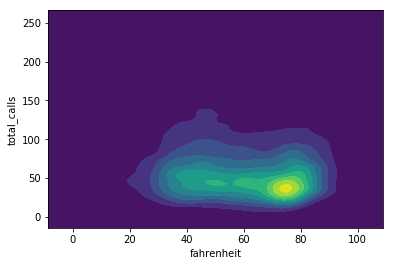

In [0]:
dfTemp = data
dfTemp=dfTemp.sort_values(by=['fahrenheit'])
dfTemp.head()
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.set_palette("Greens")
sns.kdeplot(dfTemp['fahrenheit'], dfTemp['total_calls'], cmap='viridis', shade=True);

In [0]:
#x = dfTemp['fahrenheit']
#y = dfTemp['total_calls']
#dfTemp.plot.scatter(x,y)

In [0]:
#temperature labels

data['fahrenheit'] =  round((data['fahrenheit']), -1) #######discuss with group!
temp_ranges = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0]
data['fahrenheit'].value_counts()
#count_temp_ranges = len(temp_ranges)
#data['temp_range'] = pd.cut(x=data['fahrenheit'], bins=count_temp_ranges, labels=temp_ranges)

80.0     1578
70.0     1492
40.0     1361
50.0     1354
60.0     1285
30.0      672
90.0      439
20.0      227
10.0       41
100.0      23
0.0        10
Name: fahrenheit, dtype: int64

In [0]:
#precipitation labels
data['hourly_precipitation_inches'] =  round((data['hourly_precipitation_inches']), 1)
precip_ranges = [0.0,0.1,0.2,0.3,0.4,0.5,0.8] ##discuss
count_precip_ranges = len(precip_ranges)
#data['precip_range'] = pd.cut(x=data['hourly_precipitation_inches'], bins=count_precip_ranges, labels=precip_ranges)
#data['hourly_precipitation_inches'].value_counts()

#humidity labels
data['relative_humidity'] =  round(data['relative_humidity'], -1)
#data['relative_humidity'].value_counts()
humid_ranges = [10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0]
count_humid_ranges = len(humid_ranges)
#data['humid_range'] = pd.cut(x=data['relative_humidity'], bins=count_humid_ranges, labels=humid_ranges)
#data.head()






# Collate & Average

In [0]:
#time of day labels
morning = data[::4] #THIS CODE GETS ALL ROWS OF A CERTAIN TIME OF DAY
earlyafternoon = data[1::4]
lateafternoon = data[2::4]
night = data[3::4]
NumbDivisions = 4 #times of day
##need to group by ex. temp ranges and thena average number of type 0 phone calls and build these grids
##immediate ie no time delay or daily average:
avg0D=[0] * NumbDivisions
avg1D=[0] * NumbDivisions
avg2D=[0] * NumbDivisions
avg3D=[0] * NumbDivisions
avg4D=[0] * NumbDivisions
for i in range(0,NumbDivisions):
  tempTable = data[i::4]
  avg0D[i]=(tempTable['All0'].sum())/data['All0'].sum()
  avg1D[i]=(tempTable['All1'].sum()/data['All1'].sum())
  avg2D[i]=(tempTable['All2'].sum()/data['All2'].sum())
  avg3D[i]=(tempTable['All3'].sum()/data['All3'].sum())
  avg4D[i]=(tempTable['All4'].sum()/data['All4'].sum())

In [0]:
##need to group by ex. temp ranges and thena average number of type 0 phone calls and build these grids
##immediate ie no time delay or daily average:

#group by TEMP:

#data['temp_range'].value_counts() #returns the number of instances of each of these categories within our data sets
  #creates an array that holds the average amount of that severity of crime for the given temp levles
avg0=[0] * (len(temp_ranges))
avg1=[0] * (len(temp_ranges))
avg2=[0] * (len(temp_ranges))
avg3=[0] * (len(temp_ranges))
avg4=[0] * (len(temp_ranges))
#avg0[2]
for i in range(0,len(temp_ranges)):
  tempT = data.where(data['fahrenheit'] == temp_ranges[i])
  avg0[i]=(tempT['All0'].mean())
  avg1[i]=(tempT['All1'].mean())
  avg2[i]=(tempT['All2'].mean())
  avg3[i]=(tempT['All3'].mean())
  avg4[i]=(tempT['All4'].mean())            #for each range of temps want to get the average number of calls at each crime level


In [0]:
#group by PRECIP:
#data['precip_range'].value_counts()

avgP0=[0] * (len(precip_ranges))
avgP1=[0] * (len(precip_ranges))
avgP2=[0] * (len(precip_ranges))
avgP3=[0] * (len(precip_ranges))
avgP4=[0] * (len(precip_ranges))
for i in range(0,len(precip_ranges)):
  tempP = data.drop(data[data['hourly_precipitation_inches'] != precip_ranges[i]].index)
  #tempP.head()
  avgP0[i]=(tempP['All0'].mean())
  avgP1[i]=(tempP['All1'].mean())
  avgP2[i]=(tempP['All2'].mean())
  avgP3[i]=(tempP['All3'].mean())
  avgP4[i]=(tempP['All4'].mean())


In [0]:
#group by HUMIDITY:
#data['humid_range'].value_counts()
avgH0=[0] * (len(humid_ranges))
avgH1=[0] * (len(humid_ranges))
avgH2=[0] * (len(humid_ranges))
avgH3=[0] * (len(humid_ranges))
avgH4=[0] * (len(humid_ranges))
for i in range(0,len(humid_ranges)):
  tempH = data.drop(data[data['relative_humidity'] != humid_ranges[i]].index)
  #tempP.head()
  avgH0[i]=(tempH['All0'].mean())
  avgH1[i]=(tempH['All1'].mean())
  avgH2[i]=(tempH['All2'].mean())
  avgH3[i]=(tempH['All3'].mean())
  avgH4[i]=(tempH['All4'].mean())


# Assemble Into nice DFs & Test

Time of Day

In [0]:
##might want to display these on presentation board to explain techniques, also use for visualizations if the test statistics don't look as good
#need reference distributions to perform test against

##this is the expected value if the distribution were not affected by time of day
#average0 = [data['All0'].sum()/NumbDivisions]* NumbDivisions
#average1 = [data['All1'].sum()/NumbDivisions]* NumbDivisions
#average2 = [data['All2'].sum()/NumbDivisions]* NumbDivisions
#average3 = [data['All3'].sum()/NumbDivisions]* NumbDivisions
#average4 = [data['All4'].sum()/NumbDivisions]* NumbDivisions
average0 = [1/NumbDivisions]* NumbDivisions
average1 = [1/NumbDivisions]* NumbDivisions
average2 = [1/NumbDivisions]* NumbDivisions
average3 = [1/NumbDivisions]* NumbDivisions
average4 = [1/NumbDivisions]* NumbDivisions

ToD = ['morning','early afternoon','late afternoon','night']
refdfD = pd.DataFrame({'0':average0, '1':average1,'2':average2, '3':average3,'4':average4}, index=ToD)
#refdfD['5'] = refdfD['0']*refdfD['1']*refdfD['2']*refdfD['3']*refdfD['4']
refdfD.head(n=11)

,0,1,2,3,4
morning,0.25,0.25,0.25,0.25,0.25
early afternoon,0.25,0.25,0.25,0.25,0.25
late afternoon,0.25,0.25,0.25,0.25,0.25
night,0.25,0.25,0.25,0.25,0.25


Text(0.5, 1.0, 'Time of Day Control')

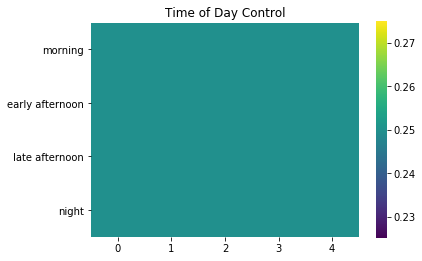

In [0]:
sns.heatmap(refdfD, robust= True,cmap=col,square=True)
plt.title('Time of Day Control')

In [0]:
dfD = pd.DataFrame({'0':avg0D, '1':avg1D,'2':avg2D, '3':avg3D,'4':avg4D}, index=ToD)
dfD = dfD.dropna()
#dfD['5'] = dfD['0']*dfD['1']*dfD['2']*dfD['3']*dfD['4']
#dfD = dfD.T
#dfD['Check'] = dfD.sum(axis=1)
dfD.head(n=11)

,0,1,2,3,4
morning,0.338858,0.237369,0.232979,0.233937,0.333333
early afternoon,0.189374,0.280441,0.322695,0.187259,0.000000
late afternoon,0.184828,0.272626,0.237589,0.367494,0.333333
night,0.286940,0.209564,0.206738,0.211310,0.333333


Text(0.5, 1.0, 'Time of Day')

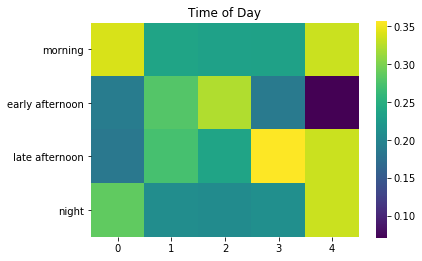

In [0]:
sns.heatmap(dfD, robust= True,cmap=col,square=True)
plt.title('Time of Day')

In [0]:
#Crime 0
print(ttest_ind(dfD['0'],refdfD['0'],))
#Crime 1
print(ttest_ind(dfD['1'], refdfD['1']))
#Crime 2
print(ttest_ind(dfD['2'], refdfD['2']))
#Crime 3
print(ttest_ind(dfD['3'], refdfD['3']))
#Crime 4
print(ttest_ind(dfD['4'], refdfD['4']))
#Crime Distribution
#print(ttest_ind(dfD['5'], refdfD['5']))

Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)


Current Temp

In [0]:
##might want to display these on presentation board to explain techniques, also use for visualizations if the test statistics don't look as good
#need reference distributions to perform test against
average0 = [data['All0'].mean()] * (len(temp_ranges))
average1 = [data['All1'].mean()] * (len(temp_ranges))
average2 = [data['All2'].mean()] * (len(temp_ranges))
average3 = [data['All3'].mean()] * (len(temp_ranges))
average4 = [data['All4'].mean()] * (len(temp_ranges))
refdfT = pd.DataFrame({'0':average0, '1':average1,'2':average2, '3':average3,'4':average4}, index=temp_ranges)
refdfT.head(n=11)

#this is the distribution if temperature/humidity/etc had no influence on temp


,0,1,2,3,4
0.0,3.215515,32.933506,0.664938,22.91594,0.000354
10.0,3.215515,32.933506,0.664938,22.91594,0.000354
20.0,3.215515,32.933506,0.664938,22.91594,0.000354
30.0,3.215515,32.933506,0.664938,22.91594,0.000354
40.0,3.215515,32.933506,0.664938,22.91594,0.000354
50.0,3.215515,32.933506,0.664938,22.91594,0.000354
60.0,3.215515,32.933506,0.664938,22.91594,0.000354
70.0,3.215515,32.933506,0.664938,22.91594,0.000354
80.0,3.215515,32.933506,0.664938,22.91594,0.000354
90.0,3.215515,32.933506,0.664938,22.91594,0.000354


Text(0.5, 1.0, 'Temperature Control')

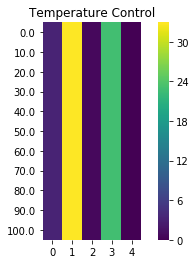

In [0]:
sns.heatmap(refdfT, robust= True,cmap=col,square=True)
plt.title('Temperature Control')

In [0]:
##let's build one for crime level and current temp
dfT = pd.DataFrame({'0':avg0, '1':avg1,'2':avg2, '3':avg3,'4':avg4}, index=temp_ranges)
dfT = dfT.dropna()
dfT.head(n=11)

,0,1,2,3,4
0.0,0.000000,51.700000,0.000000,0.400000,0.000000
10.0,4.243902,40.780488,0.195122,5.682927,0.000000
20.0,5.722467,39.533040,0.409692,17.960352,0.000000
30.0,8.159226,37.964286,0.462798,18.714286,0.000000
40.0,7.133725,31.900073,0.591477,26.584864,0.000000
50.0,5.110783,31.265140,0.715657,26.426145,0.000739
60.0,1.792996,31.361089,0.621012,22.671595,0.000000
70.0,0.727212,30.406166,0.627346,19.656836,0.000000
80.0,0.190114,32.876426,0.728771,22.862484,0.000634
90.0,0.000000,41.334852,1.236902,23.763098,0.002278


Text(0.5, 1.0, 'Temperature')

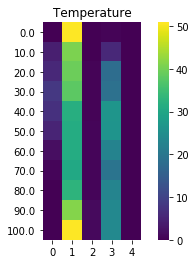

In [0]:
sns.heatmap(dfT, robust= True,cmap=col,square=True)
plt.title('Temperature')

In [0]:
#Crime 0
print(ttest_ind(dfT['0'], refdfT['0']))
#Crime 1
print(ttest_ind(dfT['1'], refdfT['1']))
#Crime 2
print(ttest_ind(dfT['2'], refdfT['2']))
#Crime 3
print(ttest_ind(dfT['3'], refdfT['3']))
#Crime 4
print(ttest_ind(dfT['4'], refdfT['4']))


Ttest_indResult(statistic=-0.21986939451897106, pvalue=0.8282015043318728)
Ttest_indResult(statistic=2.245259698602985, pvalue=0.036215224809697105)
Ttest_indResult(statistic=-0.4538797231802387, pvalue=0.6548022210740039)
Ttest_indResult(statistic=-1.5513513032750486, pvalue=0.13649828507316944)
Ttest_indResult(statistic=-0.10329736514779322, pvalue=0.9187557466183773)


Current Precip

In [0]:
average0 = [data['All0'].mean()]* (len(precip_ranges))
average1 = [data['All1'].mean()]* (len(precip_ranges))
average2 = [data['All2'].mean()]* (len(precip_ranges))
average3 = [data['All3'].mean()]* (len(precip_ranges))
average4 = [data['All4'].mean()]* (len(precip_ranges))
refdfP = pd.DataFrame({'0':average0, '1':average1,'2':average2, '3':average3,'4':average4}, index=precip_ranges)
refdfP.head(n=8)


,0,1,2,3,4
0.0,3.215515,32.933506,0.664938,22.91594,0.000354
0.1,3.215515,32.933506,0.664938,22.91594,0.000354
0.2,3.215515,32.933506,0.664938,22.91594,0.000354
0.3,3.215515,32.933506,0.664938,22.91594,0.000354
0.4,3.215515,32.933506,0.664938,22.91594,0.000354
0.5,3.215515,32.933506,0.664938,22.91594,0.000354
0.8,3.215515,32.933506,0.664938,22.91594,0.000354


Text(0.5, 1.0, 'Precipitation Control')

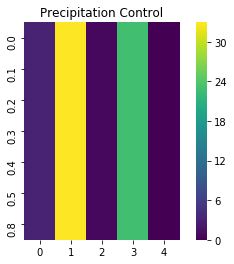

In [0]:
sns.heatmap(refdfP, robust= True,cmap=col,square=True)
plt.title('Precipitation Control')

In [0]:
dfP = pd.DataFrame({'0':avgP0, '1':avgP1,'2':avgP2, '3':avgP3,'4':avgP4}, index=precip_ranges)
dfP = dfP.dropna()
dfP.head(n=8)

,0,1,2,3,4
0.0,3.247221,32.837914,0.652131,23.139612,0.000366
0.1,2.573222,35.422594,0.970711,16.673640,0.000000
0.2,2.176471,40.176471,1.176471,17.411765,0.000000
0.3,0.000000,30.600000,1.466667,18.666667,0.000000
0.4,0.000000,35.750000,0.750000,12.500000,0.000000
0.5,0.000000,27.000000,2.000000,11.000000,0.000000
0.8,0.000000,10.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Precipitation')

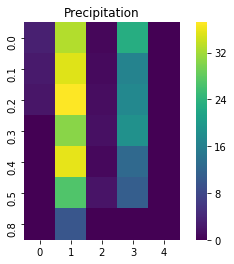

In [0]:
sns.heatmap(dfP, robust= True,cmap=col,square=True)
plt.title('Precipitation')

In [0]:
#Crime 0
print(ttest_ind(dfP['0'], refdfP['0']))
#Crime 1
print(ttest_ind(dfP['1'], refdfP['1']))
#Crime 2
print(ttest_ind(dfP['2'], refdfP['2']))
#Crime 3
print(ttest_ind(dfP['3'], refdfP['3']))
#Crime 4
print(ttest_ind(dfP['4'], refdfP['4']))

##Precipitation has the greatest affect at 0th crime level

Ttest_indResult(statistic=-3.760087388764949, pvalue=0.002720484291667561)
Ttest_indResult(statistic=-0.7188573744613826, pvalue=0.4859917522077897)
Ttest_indResult(statistic=1.4015405843965654, pvalue=0.18638314915797508)
Ttest_indResult(statistic=-3.1048224841989103, pvalue=0.009108028433394732)
Ttest_indResult(statistic=-5.756543268097148, pvalue=9.069788196485745e-05)


Humditiy

In [0]:
average0 = [data['All0'].mean()]* (len(humid_ranges))
average1 = [data['All1'].mean()]* (len(humid_ranges))
average2 = [data['All2'].mean()]* (len(humid_ranges))
average3 = [data['All3'].mean()]* (len(humid_ranges))
average4 = [data['All4'].mean()]* (len(humid_ranges))
refdfH = pd.DataFrame({'0':average0, '1':average1,'2':average2, '3':average3,'4':average4}, index=humid_ranges)
refdfH.head(n=11)

,0,1,2,3,4
10.0,3.215515,32.933506,0.664938,22.91594,0.000354
20.0,3.215515,32.933506,0.664938,22.91594,0.000354
30.0,3.215515,32.933506,0.664938,22.91594,0.000354
40.0,3.215515,32.933506,0.664938,22.91594,0.000354
50.0,3.215515,32.933506,0.664938,22.91594,0.000354
60.0,3.215515,32.933506,0.664938,22.91594,0.000354
70.0,3.215515,32.933506,0.664938,22.91594,0.000354
80.0,3.215515,32.933506,0.664938,22.91594,0.000354
90.0,3.215515,32.933506,0.664938,22.91594,0.000354
100.0,3.215515,32.933506,0.664938,22.91594,0.000354


Text(0.5, 1.0, 'Humidity Control')

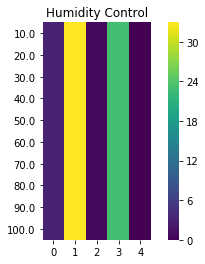

In [0]:
sns.heatmap(refdfH, robust= True,cmap=col,square=True)
plt.title('Humidity Control')

In [0]:

dfH = pd.DataFrame({'0':avgH0, '1':avgH1,'2':avgH2, '3':avgH3,'4':avgH4}, index=humid_ranges)
dfH = dfH.dropna()
dfH.head(n=11)

,0,1,2,3,4
20.0,16.802632,35.276316,1.092105,22.447368,0.000000
30.0,11.370787,40.056180,0.893258,20.382022,0.000000
40.0,5.033746,39.667042,0.742407,20.440945,0.000000
50.0,4.031960,36.311186,0.755257,24.178301,0.001682
60.0,2.627676,34.032110,0.607798,22.889144,0.000765
70.0,2.600766,32.968582,0.563985,23.535632,0.000000
80.0,2.252188,30.083532,0.595863,22.928401,0.000000
90.0,1.838102,27.785764,0.554780,21.972784,0.000000
100.0,0.580060,28.110272,0.906344,26.184290,0.000000


Text(0.5, 1.0, 'Humidity')

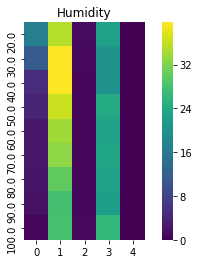

In [0]:
sns.heatmap(dfH, robust= True,cmap=col,square=True)
plt.title('Humidity')

In [0]:
#Crime 0
print(ttest_ind(dfH['0'], refdfH['0']))
#Crime 1
print(ttest_ind(dfH['1'], refdfH['1']))
#Crime 2
print(ttest_ind(dfH['2'], refdfH['2']))
#Crime 3
print(ttest_ind(dfH['3'], refdfH['3']))
#Crime 4
print(ttest_ind(dfH['4'], refdfH['4']))

Ttest_indResult(statistic=1.1996111022459306, pvalue=0.24674314463830282)
Ttest_indResult(statistic=0.6121182940306366, pvalue=0.5485599178835918)
Ttest_indResult(statistic=1.3739524264073226, pvalue=0.18730278747433066)
Ttest_indResult(statistic=-0.2505485868057531, pvalue=0.805166123051094)
Ttest_indResult(statistic=-0.4429813823229991, pvalue=0.6633644831723087)


# Test Tables

In [0]:
##t-test for each column with the difference between expected amt and amt given temp:
dfT2 = refdfT - dfT #differences --For visualization
dfT2.head(n=11)

,0,1,2,3,4
0.0,3.215515,-18.766494,0.664938,22.515940,0.000354
10.0,-1.028387,-7.846982,0.469816,17.233013,0.000354
20.0,-2.506952,-6.599533,0.255246,4.955587,0.000354
30.0,-4.943711,-5.030779,0.202140,4.201654,0.000354
40.0,-3.918210,1.033433,0.073461,-3.668924,0.000354
50.0,-1.895268,1.668366,-0.050720,-3.510205,-0.000385
60.0,1.422519,1.572417,0.043926,0.244344,0.000354
70.0,2.488303,2.527340,0.037592,3.259103,0.000354
80.0,3.025401,0.057080,-0.063833,0.053455,-0.000280
90.0,3.215515,-8.401346,-0.571965,-0.847158,-0.001924


Text(0.5, 1.0, 'test')

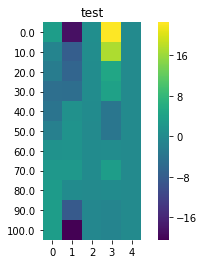

In [0]:
sns.heatmap(dfT2,cmap=col,square=True)
plt.title('test')

# Conclusions & Graph Generation

In [0]:
temp.head()

,8,9,10,11,12,13,14,15,16,17,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
##do that here
##need vertical averages and then place them into a df with rows and columns
data.head()


,start_date,end_date,number_rows,number_columns,total_calls,fahrenheit,hourly_precipitation_inches,relative_humidity,ToD,All0,All1,All2,All3,All4
0,2013-07-01T00:00,2013-07-01T06:00,50,50,21,80.0,0.0,90.0,0,0,21,0,0,0
1,2013-07-01T06:00,2013-07-01T12:00,50,50,34,80.0,0.0,80.0,1,0,34,0,0,0
2,2013-07-01T12:00,2013-07-01T18:00,50,50,26,80.0,0.0,80.0,1,0,26,0,0,0
3,2013-07-01T18:00,2013-07-02T00:00,50,50,42,80.0,0.0,90.0,0,0,42,0,0,0
4,2013-07-02T00:00,2013-07-02T06:00,50,50,24,80.0,0.0,90.0,0,0,24,0,0,0


In [0]:

#for zero level crime
for i in range(0,nPlaces):
    place[i] = temp.loc[:,8+(i*5)].mean(axis=0)
p = pd.DataFrame(place)
p.head(n=10)
df = pd.DataFrame(np.array(place).reshape(nColumns,nRows))
df.head(n=8)
#p.shape(nRows,nColumns)
#place[i] = temp.loc[:,8+((nPlaces-1)*5)].mean(axis=0)
#print(8+(5*nPlaces))


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.000354,0.000000,0.000118,0.000354,0.000118,0.000118,0.000000,0.000000,0.000118,...,0.000943,0.000354,0.000000,0.000000,0.000000,0.000000,0.000707,0.000236,0.000000,0.000000
1,0.000000,0.000236,0.000236,0.000000,0.000825,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001533,0.001061,0.001415,0.001061,0.000118,0.001415,0.000354,0.000000,0.000589,0.000000
2,0.000354,0.000354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000118,0.000000,...,0.000354,0.000236,0.000000,0.000354,0.002122,0.001061,0.000000,0.000000,0.000000,0.000000
3,0.000472,0.001415,0.000236,0.000354,0.000472,0.000118,0.000000,0.000118,0.000000,0.000118,...,0.000589,0.000000,0.000236,0.000825,0.001768,0.000000,0.000236,0.000472,0.000118,0.000000
4,0.000000,0.000118,0.003537,0.000472,0.000236,0.000825,0.000354,0.000118,0.000354,0.000354,...,0.000472,0.000000,0.000707,0.001886,0.000354,0.000000,0.000236,0.000354,0.000118,0.000236
5,0.000236,0.001415,0.000000,0.002240,0.000825,0.000236,0.000236,0.003655,0.000707,0.000825,...,0.000354,0.000472,0.001768,0.000236,0.000118,0.000236,0.000236,0.000118,0.000236,0.000825
6,0.000000,0.000000,0.000118,0.000236,0.001061,0.002594,0.001886,0.002122,0.011318,0.026645,...,0.000354,0.001768,0.000236,0.000472,0.000118,0.000472,0.000472,0.000000,0.001651,0.000825
7,0.000118,0.000236,0.000236,0.001061,0.000472,0.002947,0.009903,0.015680,0.022518,0.006131,...,0.000943,0.000472,0.000118,0.000118,0.000236,0.000236,0.000118,0.001179,0.000000,0.000118


Text(0.5, 1.0, 'Average Crime 0')

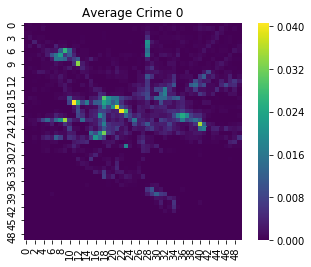

In [0]:
sns.heatmap(df, cmap=col,square=True)
plt.title('Average Crime 0')

In [0]:
#Class 1 Crime
for i in range(0,nPlaces):
    place[i] = temp.loc[:,9+(i*5)].mean(axis=0)
p = pd.DataFrame(place)
p.head(n=10)
df = pd.DataFrame(np.array(place).reshape(nColumns,nRows))
df.head(n=8)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.003183,0.008371,0.001297,0.002240,0.002240,0.005305,0.004244,0.000472,0.009668,0.001768,...,0.027942,0.006838,0.007192,0.004126,0.004834,0.004126,0.020986,0.014737,0.002004,0.000000
1,0.010493,0.019689,0.005541,0.000825,0.007192,0.000236,0.000472,0.000825,0.001768,0.001415,...,0.037963,0.023815,0.035487,0.012379,0.003773,0.016859,0.012497,0.001297,0.000825,0.002240
2,0.016859,0.012615,0.012261,0.012143,0.000943,0.002122,0.001768,0.003065,0.000472,0.000118,...,0.003065,0.004008,0.002830,0.006838,0.030417,0.018274,0.004598,0.003183,0.000825,0.000000
3,0.020278,0.044565,0.020750,0.017213,0.012497,0.003301,0.003301,0.002947,0.002594,0.003891,...,0.006131,0.005070,0.006013,0.017802,0.020396,0.001297,0.004008,0.008253,0.006602,0.003301
4,0.001768,0.011554,0.092667,0.011318,0.003655,0.014501,0.010729,0.004244,0.005777,0.005541,...,0.014501,0.006013,0.019335,0.021811,0.006131,0.002004,0.003183,0.006956,0.003891,0.006838
5,0.017331,0.029710,0.001651,0.035841,0.024405,0.006602,0.007899,0.034897,0.015091,0.009314,...,0.005777,0.025230,0.043386,0.005541,0.006956,0.003419,0.005541,0.006720,0.004480,0.012733
6,0.002004,0.000825,0.002712,0.001297,0.020396,0.035369,0.017449,0.016623,0.040439,0.078048,...,0.005541,0.032068,0.007781,0.005187,0.003773,0.005187,0.010021,0.003419,0.039849,0.015562
7,0.003655,0.004126,0.005187,0.020042,0.000589,0.038906,0.095968,0.059774,0.127564,0.040910,...,0.023344,0.015680,0.007899,0.013087,0.009078,0.006720,0.012733,0.024876,0.003655,0.003301


Text(0.5, 1.0, 'Average Crime 1')

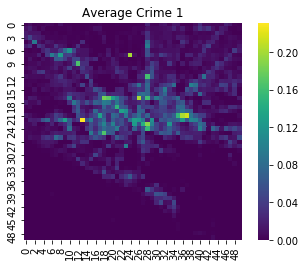

In [0]:
sns.heatmap(df,cmap=col,square=True)
plt.title('Average Crime 1')

In [0]:
#Class 2 Crime
for i in range(0,nPlaces):
    place[i] = temp.loc[:,10+(i*5)].mean(axis=0)
p = pd.DataFrame(place)
p.head(n=10)
df = pd.DataFrame(np.array(place).reshape(nColumns,nRows))
df.head(n=8)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000118,0.000472,0.000000,0.000118,0.000118,0.000000,0.000000,0.000000,0.000236,0.000000,...,0.000825,0.000472,0.000236,0.000118,0.000236,0.000000,0.000000,0.000472,0.000118,0.000000
1,0.000472,0.000707,0.000000,0.000000,0.000354,0.000000,0.000000,0.000000,0.000000,0.000118,...,0.001179,0.000236,0.000472,0.000354,0.000118,0.000236,0.000118,0.000000,0.000000,0.000000
2,0.000354,0.000236,0.000472,0.000472,0.000000,0.000236,0.000118,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000354,0.000589,0.000236,0.000354,0.000472,0.000000,0.000000
3,0.000236,0.001651,0.000118,0.000589,0.000354,0.000000,0.000236,0.000354,0.000118,0.000354,...,0.000236,0.000236,0.000000,0.000354,0.000118,0.000000,0.000000,0.000236,0.000118,0.000118
4,0.000000,0.000118,0.001061,0.001061,0.000236,0.000354,0.000354,0.000118,0.000118,0.000236,...,0.000236,0.000118,0.000707,0.000118,0.000236,0.000236,0.000000,0.000118,0.000118,0.000000
5,0.000236,0.000707,0.000000,0.000707,0.000589,0.000354,0.000000,0.000943,0.000236,0.000000,...,0.000236,0.000472,0.000943,0.000118,0.000118,0.000118,0.000118,0.000236,0.000236,0.000472
6,0.000000,0.000000,0.000236,0.000118,0.000354,0.000943,0.000707,0.000354,0.000236,0.001179,...,0.000118,0.000589,0.000118,0.000236,0.000118,0.000236,0.000236,0.000354,0.001179,0.000472
7,0.000118,0.000236,0.000000,0.000589,0.000000,0.000707,0.000825,0.000943,0.002712,0.000354,...,0.000589,0.000000,0.000472,0.000236,0.000236,0.000472,0.000236,0.000707,0.000118,0.000118


Text(0.5, 1.0, 'Average Crime 2')

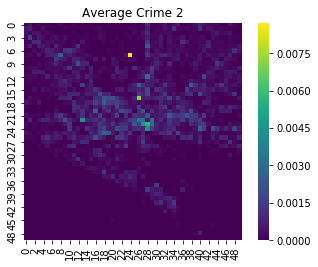

In [0]:
sns.heatmap(df,cmap=col,square=True)
plt.title('Average Crime 2')

In [0]:
#Class 3 Crime
for i in range(0,nPlaces):
    place[i] = temp.loc[:,11+(i*5)].mean(axis=0)
p = pd.DataFrame(place)
p.head(n=10)
df = pd.DataFrame(np.array(place).reshape(nColumns,nRows))
df.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.001768,0.001297,0.000354,0.001297,0.001886,0.001768,0.001533,0.000236,0.001651,0.000354,...,0.008135,0.002122,0.001061,0.000707,0.000825,0.000707,0.013794,0.006838,0.000118,0.000000
1,0.001415,0.002004,0.001061,0.000000,0.001415,0.000589,0.000118,0.000236,0.001061,0.000707,...,0.015444,0.010493,0.022518,0.004834,0.000943,0.014266,0.006602,0.000589,0.001415,0.000236
2,0.004480,0.003065,0.002240,0.002947,0.000000,0.000472,0.000472,0.000825,0.000118,0.000236,...,0.001651,0.000589,0.000825,0.004244,0.021457,0.013912,0.001061,0.000707,0.000707,0.000000
3,0.004126,0.012379,0.004362,0.006366,0.004834,0.001415,0.000943,0.001533,0.000707,0.000943,...,0.002240,0.001297,0.001061,0.015091,0.021221,0.000472,0.003655,0.006602,0.002476,0.000707
4,0.000118,0.005423,0.034544,0.003183,0.001651,0.006131,0.004598,0.002594,0.001179,0.001415,...,0.002947,0.002240,0.010611,0.022400,0.003773,0.001061,0.001061,0.004008,0.001297,0.001179
5,0.003419,0.008960,0.000707,0.013322,0.011200,0.002476,0.002947,0.021221,0.007781,0.002476,...,0.002358,0.017449,0.024051,0.002358,0.002594,0.001768,0.001886,0.002830,0.001061,0.009432
6,0.000472,0.000118,0.001533,0.000118,0.008253,0.018038,0.010493,0.013794,0.049870,0.098090,...,0.001297,0.021575,0.003655,0.002476,0.001886,0.002830,0.005541,0.001768,0.018156,0.011200
7,0.001179,0.000472,0.001651,0.008842,0.001886,0.021693,0.100684,0.074039,0.115657,0.038316,...,0.016506,0.006602,0.002947,0.005777,0.003065,0.001651,0.003537,0.015327,0.000472,0.000118
8,0.000236,0.004126,0.000118,0.000000,0.006720,0.003065,0.010846,0.072860,0.080052,0.040085,...,0.010375,0.002476,0.002122,0.003537,0.002712,0.000825,0.027470,0.020396,0.001886,0.001533
9,0.000354,0.000472,0.002594,0.006249,0.001886,0.001415,0.004834,0.015091,0.006013,0.003183,...,0.007074,0.000472,0.001297,0.002712,0.023697,0.029238,0.003065,0.002240,0.000825,0.000472


Text(0.5, 1.0, 'Average Crime 3')

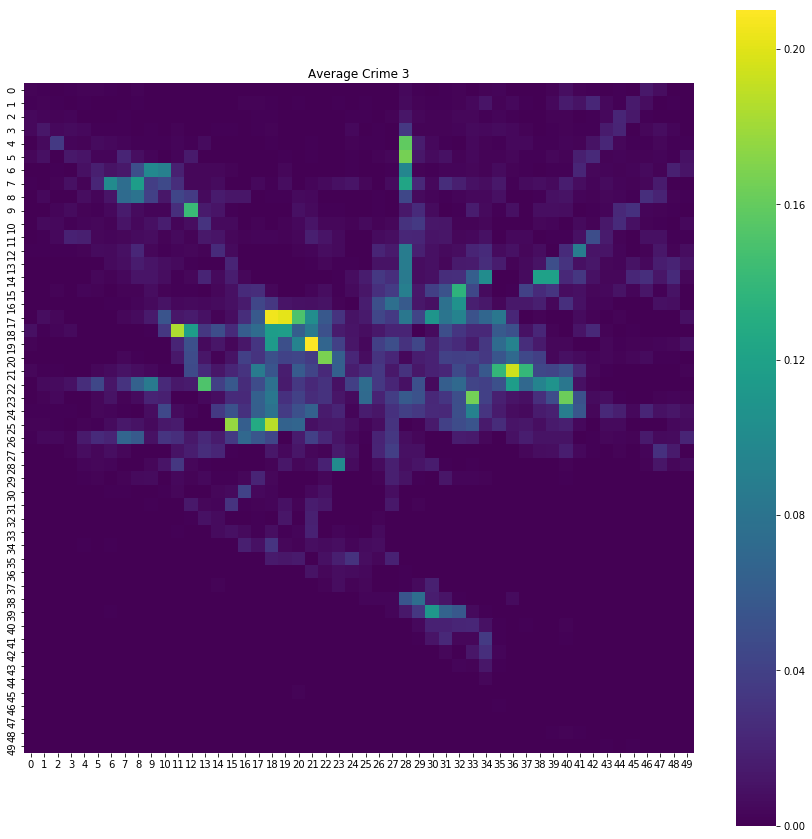

In [0]:
plt.figure(figsize=(15, 15))
sns.heatmap(df,cmap=col,square=True)
plt.title('Average Crime 3')

In [0]:
#Class 4 Crime
for i in range(0,nPlaces):
    place[i] = temp.loc[:,12+(i*5)].mean(axis=0)
p = pd.DataFrame(place)
p.head(n=10)
df = pd.DataFrame(np.array(place).reshape(nColumns,nRows))
df.head(n=8)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Average Crime 4')

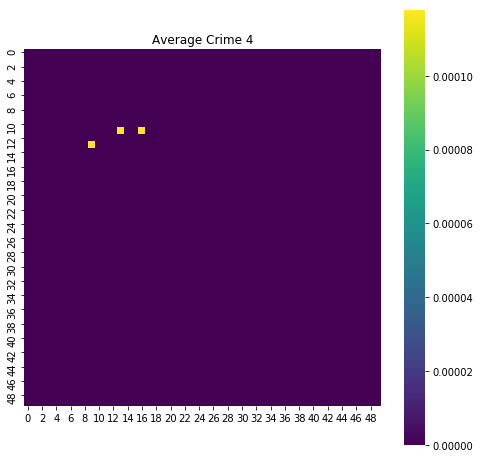

In [0]:
plt.figure(figsize=(8, 8))
sns.heatmap(df,cmap=col,square=True)
plt.title('Average Crime 4')

In [0]:
#All Crime
for i in range(0,nPlaces):
    place[i] = temp.loc[:,12+(i*5)].mean(axis=0)+temp.loc[:,11+(i*5)].mean(axis=0)+temp.loc[:,10+(i*5)].mean(axis=0)+temp.loc[:,9+(i*5)].mean(axis=0)+temp.loc[:,8+(i*5)].mean(axis=0)
p = pd.DataFrame(place)
p.head(n=10)
df = pd.DataFrame(np.array(place).reshape(nColumns,nRows))
df.head(n=8)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.005070,0.010493,0.001651,0.003773,0.004598,0.007192,0.005895,0.000707,0.011554,0.002240,...,0.037845,0.009785,0.008489,0.004952,0.005895,0.004834,0.035487,0.022282,0.002240,0.000000
1,0.012379,0.022636,0.006838,0.000825,0.009785,0.000825,0.000589,0.001061,0.002830,0.002240,...,0.056119,0.035605,0.059892,0.018628,0.004952,0.032775,0.019571,0.001886,0.002830,0.002476
2,0.022047,0.016270,0.014973,0.015562,0.000943,0.002830,0.002358,0.003891,0.000707,0.000354,...,0.005070,0.004834,0.003655,0.011790,0.054586,0.033483,0.006013,0.004362,0.001533,0.000000
3,0.025112,0.060009,0.025466,0.024523,0.018156,0.004834,0.004480,0.004952,0.003419,0.005305,...,0.009196,0.006602,0.007310,0.034072,0.043504,0.001768,0.007899,0.015562,0.009314,0.004126
4,0.001886,0.017213,0.131809,0.016034,0.005777,0.021811,0.016034,0.007074,0.007427,0.007545,...,0.018156,0.008371,0.031361,0.046216,0.010493,0.003301,0.004480,0.011436,0.005423,0.008253
5,0.021221,0.040792,0.002358,0.052110,0.037020,0.009668,0.011082,0.060717,0.023815,0.012615,...,0.008724,0.043622,0.070149,0.008253,0.009785,0.005541,0.007781,0.009903,0.006013,0.023461
6,0.002476,0.000943,0.004598,0.001768,0.030064,0.056944,0.030535,0.032893,0.101863,0.203961,...,0.007310,0.056001,0.011790,0.008371,0.005895,0.008724,0.016270,0.005541,0.060835,0.028059
7,0.005070,0.005070,0.007074,0.030535,0.002947,0.064254,0.207380,0.150436,0.268451,0.085711,...,0.041382,0.022754,0.011436,0.019217,0.012615,0.009078,0.016623,0.042089,0.004244,0.003655


Text(0.5, 1.0, 'Average Crime')

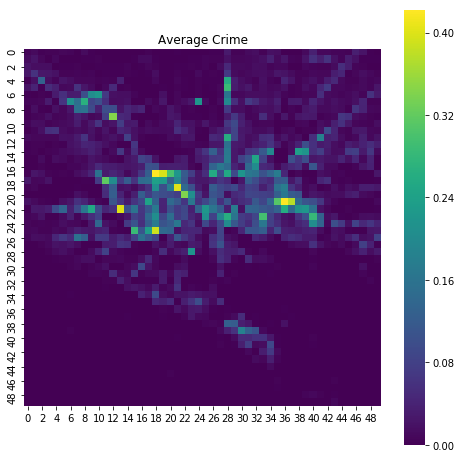

In [0]:
plt.figure(figsize=(8, 8))
sns.heatmap(df,cmap=col,square=True)
plt.title('Average Crime')

In [0]:
#All Crime
for i in range(0,nPlaces):
    place[i] = temp.loc[:,12+(i*5)].sum(axis=0)+temp.loc[:,11+(i*5)].sum(axis=0)+temp.loc[:,10+(i*5)].sum(axis=0)+temp.loc[:,9+(i*5)].sum(axis=0)+temp.loc[:,8+(i*5)].sum(axis=0)
p = pd.DataFrame(place)
p.head(n=10)
df = pd.DataFrame(np.array(place).reshape(nColumns,nRows))
df.head(n=8)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,43,89,14,32,39,61,50,6,98,19,...,321,83,72,42,50,41,301,189,19,0
1,105,192,58,7,83,7,5,9,24,19,...,476,302,508,158,42,278,166,16,24,21
2,187,138,127,132,8,24,20,33,6,3,...,43,41,31,100,463,284,51,37,13,0
3,213,509,216,208,154,41,38,42,29,45,...,78,56,62,289,369,15,67,132,79,35
4,16,146,1118,136,49,185,136,60,63,64,...,154,71,266,392,89,28,38,97,46,70
5,180,346,20,442,314,82,94,515,202,107,...,74,370,595,70,83,47,66,84,51,199
6,21,8,39,15,255,483,259,279,864,1730,...,62,475,100,71,50,74,138,47,516,238
7,43,43,60,259,25,545,1759,1276,2277,727,...,351,193,97,163,107,77,141,357,36,31


Text(0.5, 1.0, 'Total Crime')

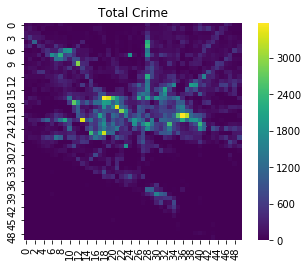

In [0]:
sns.heatmap(df,cmap=col,square=True)
plt.title('Total Crime')

In [0]:
#tables for different times of day

#All Crime
for i in range(0,nPlaces):
    place[i] = temp.loc[:,12+(i*5)].sum(axis=0)+temp.loc[:,11+(i*5)].sum(axis=0)+temp.loc[:,10+(i*5)].sum(axis=0)+temp.loc[:,9+(i*5)].sum(axis=0)+temp.loc[:,8+(i*5)].sum(axis=0)
p = pd.DataFrame(place)
p.head(n=10)
df = pd.DataFrame(np.array(place).reshape(nColumns,nRows))
df.head(n=8)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,43,89,14,32,39,61,50,6,98,19,...,321,83,72,42,50,41,301,189,19,0
1,105,192,58,7,83,7,5,9,24,19,...,476,302,508,158,42,278,166,16,24,21
2,187,138,127,132,8,24,20,33,6,3,...,43,41,31,100,463,284,51,37,13,0
3,213,509,216,208,154,41,38,42,29,45,...,78,56,62,289,369,15,67,132,79,35
4,16,146,1118,136,49,185,136,60,63,64,...,154,71,266,392,89,28,38,97,46,70
5,180,346,20,442,314,82,94,515,202,107,...,74,370,595,70,83,47,66,84,51,199
6,21,8,39,15,255,483,259,279,864,1730,...,62,475,100,71,50,74,138,47,516,238
7,43,43,60,259,25,545,1759,1276,2277,727,...,351,193,97,163,107,77,141,357,36,31
